# Latihan Membuat Proyek Sistem Rekomendasi (Model Development dengan Collaborative Filtering) 

Bayangkan Anda adalah seorang Data Scientist di perusahaan food delivery service. Setelah sekian lama beroperasi, perusahaan Anda berhasil mengumpulkan berbagai informasi mengenai pelanggan, restoran dan masakannya, serta rating yang diberikan pelanggan untuk restoran-restoran tersebut. Seluruh informasi ini terkumpul dalam [restaurant and consumer](https://archive.ics.uci.edu/ml/datasets/Restaurant+%26+consumer+data) dataset. 

### Problem Statement
Sebagai seorang Data Scientist, tentu Anda ingin memanfaatkan data tersebut untuk meningkatkan transaksi di perusahaan. Kembangkan sebuah sistem rekomendasi restoran untuk menjawab permasalahan berikut:

- Berdasarkan data mengenai pengguna, bagaimana membuat sistem rekomendasi yang dipersonalisasi dengan teknik collaborative filtering?
- Dengan data rating yang Anda miliki, bagaimana perusahaan dapat merekomendasi sejumlah restoran yang sesuai dengan preferensi pengguna berdasarkan rating yang telah diberikan sebelumnya? 

### Goals
Goal proyek kita kali ini adalah menghasilkan rekomendasi sejumlah restoran yang sesuai dengan preferensi pengguna berdasarkan rating yang telah diberikan sebelumnya. Dari data rating pengguna, kita akan mengidentifikasi restoran-restoran yang mirip dan belum pernah dikunjungi oleh pengguna untuk direkomendasikan. Kita akan menggunakan teknik collaborative filtering untuk membuat rekomendasi ini. 

### Solution Statement
Nah, untuk mencapai goals yang diinginkan, kita akan membuat sistem rekomendasi dengan alur sebagai berikut.

1. Data Understanding
> Data Understanding adalah tahap awal proyek untuk memahami data yang dimiliki. Dalam kasus ini, kita memiliki 9 file terpisah mengenai restoran, konsumen, dan rating.

2. Univariate Exploratory Data Analysis
> Pada tahap ini, Anda melakukan analisis dan eksplorasi setiap variabel pada data. Jika dibutuhkan, Anda dapat melakukan eksplorasi lebih lanjut mengenai keterkaitan antara satu variabel dengan variabel lainnya.

3. Data Preprocessing
> Ini merupakan tahap persiapan data sebelum data digunakan untuk proses selanjutnya. Pada tahap ini, Anda akan melakukan penggabungan beberapa file sehingga menjadi satu kesatuan file yang utuh dan siap digunakan dalam tahap pemodelan.

4. Data Preparation
> Pada tahap ini, Anda mempersiapkan data dan melakukan beberapa teknik seperti mengatasi missing value dan menyamakan jenis masakan. Pada sistem rekomendasi berbasis konten (content-based filtering) yang akan Anda kembangkan, satu restoran mewakili satu kategori masakan. Oleh karena itu, Anda perlu mengecek ulang dan memastikan setiap restoran memiliki satu kategori masakan.

5. Model Delopment dengan Collaborative Filtering
> Pada tahap ini, sistem merekomendasikan sejumlah restoran berdasarkan rating yang telah diberikan sebelumnya. Dari data rating pengguna, kita akan mengidentifikasi restoran-restoran yang mirip dan belum pernah dikunjungi oleh pengguna untuk direkomendasikan.

Yuk, langsung kenalan dengan dataset yang akan kita gunakan di proyek ini.

## Data Understanding



In [ ]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
# download dataset with google colab
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00232/RCdata.zip

--2022-11-10 00:45:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/00232/RCdata.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39674 (39K) [application/x-httpd-php]
Saving to: ‘RCdata.zip’

RCdata.zip          100%[===================>]  38.74K  --.-KB/s    in 0.02s   

2022-11-10 00:45:47 (1.68 MB/s) - ‘RCdata.zip’ saved [39674/39674]



Jika berhasil, file RCdata.zip akan masuk ke sistem storage Google Colab. Kemudian, lakukan unzip file dengan menerapkan kode berikut.

In [ ]:
# unzip file
!unzip /content/RCdata.zip

Archive:  /content/RCdata.zip
  inflating: chefmozaccepts.csv      
  inflating: chefmozcuisine.csv      
  inflating: chefmozhours4.csv       
  inflating: chefmozparking.csv      
  inflating: geoplaces2.csv          
  inflating: rating_final.csv        
  inflating: README                  
  inflating: usercuisine.csv         
  inflating: userpayment.csv         
  inflating: userprofile.csv         


Kesembilan file tersebut dapat kita kategorikan menjadi 3, yaitu restaurant, consumers, dan user-item-rating.

| Restaurant | Consumers | User-Item-rating |
| -------- | -------- | --------- |
| chefmozaccepts.csv | usercuisine.csv| rating_final.csv | 
| chefmozcuisine.csv | userpayment.csv | |
| chefmozhours4.csv | userprofile.csv | |
| chefmozparking.csv |
| geoplaces2.csv |

Selanjutnya, mari kita baca data-data di atas dengan menggunakan fungsi pandas.read_csv. Implementasikan kode berikut.


In [ ]:
#data loaded
import pandas as pd
accepts = pd.read_csv('/content/chefmozaccepts.csv')
cuisine = pd.read_csv('/content/chefmozcuisine.csv')
hours = pd.read_csv('/content/chefmozhours4.csv')
parking = pd.read_csv('/content/chefmozparking.csv')
geo = pd.read_csv('/content/geoplaces2.csv', encoding='ISO-8859-1')
usercuisine = pd.read_csv('/content/usercuisine.csv')
payment = pd.read_csv('/content/userpayment.csv')
profile = pd.read_csv('/content/userprofile.csv')
rating = pd.read_csv('/content/rating_final.csv')

Selanjutnya, pahami terlebih dahulu data rating yang kita miliki. Ingatlah saat Anda melakukan load data di awal dan membaca file **rating_final.csv**. Saat itu, Anda membuat variabel rating dan menetapkan data pada variabel tersebut. Untuk memudahkan supaya tidak tertukar dengan fitur ‘rating’ pada data, kita ubah nama variabel rating menjadi **df**.

In [ ]:
df = rating
df

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


## Univariate Exploratory Data Analysis




### Rating


In [ ]:
df.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


Dari fungsi rating.head(), kita dapat mengetahui bahwa data rating terdiri dari 5 kolom dengan tiga kategori rating. Kolom-kolom tersebut antara lain:

- userID, merupakan identitas pengguna.
- placeID, merupakan identitas restoran.
- Rating, merupakan data rating untuk restoran.
- Food_rating, merupakan data rating untuk makanan atau masakan di restoran tersebut.
- Service_rating, merupakan data layanan restoran tersebut.

Nah, untuk melihat distribusi rating pada data, gunakan fungsi describe() dengan menerapkan kode berikut:

In [ ]:
df.describe()

,placeID,rating,food_rating,service_rating
count,1161.000000,1161.000000,1161.000000,1161.000000
mean,134192.041344,1.199828,1.215332,1.090439
std,1100.916275,0.773282,0.792294,0.790844
min,132560.000000,0.000000,0.000000,0.000000
25%,132856.000000,1.000000,1.000000,0.000000
50%,135030.000000,1.000000,1.000000,1.000000
75%,135059.000000,2.000000,2.000000,2.000000
max,135109.000000,2.000000,2.000000,2.000000


Dari output di atas, diketahui bahwa nilai maksimum rating adalah 2 dan nilai minimumnya adalah 0. **Artinya, skala rating berkisar antara 0 hingga 2.** 

Untuk melihat berapa pengguna yang memberikan rating, jumlah restoran, dan jumlah rating, jalankan kode berikut.

In [ ]:
print('Jumlah userID: ', len(df.userID.unique()))
print('Jumlah placeID: ', len(df.placeID.unique()))
print('Jumlah data rating: ', len(df))

Jumlah userID:  138
Jumlah placeID:  130
Jumlah data rating:  1161


## Data Preprocessing (Preparation)

Pada tahap ini, Anda perlu melakukan persiapan data untuk menyandikan (encode) fitur ‘user’ dan ‘placeID’ ke dalam indeks integer


In [ ]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['userID'].unique().tolist()
print('list userID: ', user_ids)
 
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID: ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  ['U1077', 'U1068', 'U1067', 'U1103', 'U1107', 'U1044', 'U1070', 'U1031', 'U1082', 'U1023', 'U1060', 'U1015', 'U1123', 'U1021', 'U1026', 'U1083', 'U1108', 'U1012', 'U1093', 'U1030', 'U1066', 'U1127', 'U1017', 'U1100', 'U1133', 'U1118', 'U1072', 'U1080', 'U1063', 'U1074', 'U1117', 'U1020', 'U1051', 'U1055', 'U1053', 'U1035', 'U1064', 'U1081', 'U1001', 'U1014', 'U1088', 'U1056', 'U1134', 'U1106', 'U1126', 'U1124', 'U1018', 'U1125', 'U1119', 'U1076', 'U1022', 'U1094', 'U1116', 'U1105', 'U1075', 'U1007', 'U1115', 'U1024', 'U1132', 'U1005', 'U1120', 'U1004', 'U1037', 'U1052', 'U1036', 'U1038', 'U1071', 'U1114', 'U1084', 'U1049', 'U1019', 'U1069', 'U1113', 'U1104', 'U1079', 'U1045', 'U1009', 'U1016', 'U1047', 'U1095', 'U1034', 'U1078', 'U1099', 'U1008', 'U1040', 'U1121', 'U1110', 'U1042', 'U1013', 'U1054', 'U1111', 'U1128', 'U1062', 'U1101', 'U1135', 'U1032', 'U1048', 'U1092', 'U1085', 'U1109', 'U1102', 'U1098', 'U1046', 'U1122', 'U1138', 'U1033', 'U1089', 'U1003', 'U1091', 'U10

Selanjutnya, lakukan hal yang sama pada fitur ‘placeID’.

In [ ]:
# Mengubah placeID menjadi list tanpa nilai yang sama
resto_ids = df['placeID'].unique().tolist()
 
# Melakukan proses encoding placeID
resto_to_resto_encoded = {x: i for i, x in enumerate(resto_ids)}
 
# Melakukan proses encoding angka ke placeID
resto_encoded_to_resto = {i: x for i, x in enumerate(resto_ids)}

Berikutnya, petakan userID dan placeID ke dataframe yang berkaitan.

In [ ]:
# Mapping userID ke dataframe user
df['user'] = df['userID'].map(user_to_user_encoded)
 
# Mapping placeID ke dataframe resto
df['resto'] = df['placeID'].map(resto_to_resto_encoded)

df

,userID,placeID,rating,food_rating,service_rating,user,resto
0,U1077,135085,2,2,2,0,0
1,U1077,135038,2,2,1,0,1
2,U1077,132825,2,2,2,0,2
3,U1077,135060,1,2,2,0,3
4,U1068,135104,1,1,2,1,4
...,...,...,...,...,...,...,...
1156,U1043,132630,1,1,1,136,8
1157,U1011,132715,1,1,0,137,21
1158,U1068,132733,1,1,0,1,10
1159,U1068,132594,1,1,1,1,23


Terakhir, cek beberapa hal dalam data seperti jumlah user, jumlah resto, dan mengubah nilai rating menjadi float.

In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah resto
num_resto = len(resto_encoded_to_resto)
print(num_resto)
 
# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['rating'])
 
# Nilai maksimal rating
max_rating = max(df['rating'])
 
print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_resto, min_rating, max_rating
))

138
130
Number of User: 138, Number of Resto: 130, Min Rating: 0.0, Max Rating: 2.0


Tahap persiapan telah selesai. Berikut adalah hal-hal yang telah kita lakukan pada tahap ini:

- Memahami data rating yang kita miliki.
- Menyandikan (encode) fitur ‘user’ dan ‘placeID’ ke dalam indeks integer. 
- Memetakan ‘userID’ dan ‘placeID’ ke dataframe yang berkaitan.
- Mengecek beberapa hal dalam data seperti jumlah user, jumlah resto, kemudian mengubah nilai rating menjadi float.

Tahap persiapan ini penting dilakukan agar data siap digunakan untuk pemodelan. Namun sebelumnya, kita perlu membagi data untuk training dan validasi terlebih dahulu yang akan kita pelajari di materi berikutnya. Tunggu apalagi, yuk kita lanjutkan.

---

## Membagi Data Training dan Data Validasi

Anda tentu sudah menduga, pada tahap ini kita akan melakukan pembagian data menjadi data training dan validasi. Betul! Namun sebelumnya, acak datanya terlebih dahulu agar distribusinya menjadi random..

In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userID,placeID,rating,food_rating,service_rating,user,resto
538,U1052,132870,1.0,1,1,63,116
673,U1015,132869,2.0,2,2,11,115
578,U1047,132875,0.0,0,0,78,117
242,U1056,135076,2.0,2,2,41,71
1063,U1002,135106,1.0,1,1,125,64
...,...,...,...,...,...,...,...
1044,U1073,135065,0.0,0,0,123,94
1095,U1058,135062,2.0,2,2,124,76
1130,U1087,132660,1.0,1,0,132,14
860,U1029,132937,1.0,1,1,110,126


Selanjutnya, kita bagi data train dan validasi dengan komposisi 80:20. Namun sebelumnya, 
1. kita perlu memetakan (mapping) data user dan resto menjadi satu value terlebih dahulu. 
2. Lalu, buatlah rating dalam skala 0 sampai 1 agar mudah dalam melakukan proses training. 

In [ ]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[['user', 'resto']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 63 116]
 [ 11 115]
 [ 78 117]
 ...
 [132  14]
 [110 126]
 [129   6]] [0.5 1.  0.  ... 0.5 0.5 0. ]


Data telah siap untuk dimasukkan ke dalam model. Yuk lanjut ke materi berikutnya!

## Proses Training

Pada tahap ini, model menghitung skor kecocokan antara pengguna dan resto dengan teknik embedding. Pertama, kita melakukan proses embedding terhadap data user dan resto. Selanjutnya, lakukan operasi perkalian dot product antara embedding user dan resto. Selain itu, kita juga dapat menambahkan bias untuk setiap user dan resto. Skor kecocokan ditetapkan dalam skala [0,1] dengan fungsi aktivasi sigmoid.

Di sini, kita membuat class RecommenderNet dengan [keras Model class](https://keras.io/api/models/model/). Kode class RecommenderNet ini terinspirasi dari tutorial dalam situs [Keras](https://keras.io/examples/structured_data/collaborative_filtering_movielens/) dengan beberapa adaptasi sesuai kasus yang sedang kita selesaikan. Terapkan kode berikut.

In [ ]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_resto, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_resto = num_resto
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.resto_embedding = layers.Embedding( # layer embeddings resto
        num_resto,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_resto, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    resto_vector = self.resto_embedding(inputs[:, 1]) # memanggil layer embedding 3
    resto_bias = self.resto_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2) 
 
    x = dot_user_resto + user_bias + resto_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

Selanjutnya, lakukan proses compile terhadap model.

In [ ]:
model = RecommenderNet(num_users, num_resto, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Model ini menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation. 

Langkah berikutnya, mulailah proses training. 

In [ ]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
116/116 [==============================] - 2s 5ms/step - loss: 0.7042 - root_mean_squared_error: 0.4053 - val_loss: 0.6982 - val_root_mean_squared_error: 0.4040
Epoch 2/100
116/116 [==============================] - 0s 2ms/step - loss: 0.6851 - root_mean_squared_error: 0.3935 - val_loss: 0.6929 - val_root_mean_squared_error: 0.4008
Epoch 3/100
116/116 [==============================] - 0s 3ms/step - loss: 0.6617 - root_mean_squared_error: 0.3787 - val_loss: 0.6893 - val_root_mean_squared_error: 0.3985
Epoch 4/100
116/116 [==============================] - 0s 2ms/step - loss: 0.6616 - root_mean_squared_error: 0.3786 - val_loss: 0.6857 - val_root_mean_squared_error: 0.3963
Epoch 5/100
116/116 [==============================] - 0s 3ms/step - loss: 0.6432 - root_mean_squared_error: 0.3670 - val_loss: 0.6807 - val_root_mean_squared_error: 0.3932
Epoch 6/100
116/116 [==============================] - 0s 3ms/step - loss: 0.6331 - root_mean_squared_error: 0.3604 - val_loss: 0.6769 

## Visualisasi Metrik
Untuk melihat visualisasi proses training, mari kita plot metrik evaluasi dengan matplotlib. Terapkan kode berikut.

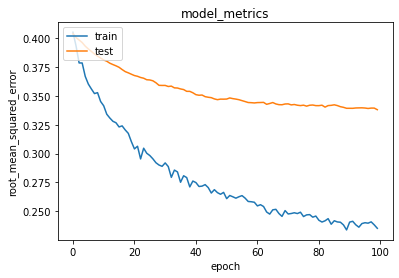

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Perhatikanlah, proses training model cukup smooth dan model konvergen pada epochs sekitar 100. Dari proses ini, kita memperoleh nilai error akhir sebesar sekitar 0.23 dan error pada data validasi sebesar 0.34. Nilai tersebut cukup bagus untuk sistem rekomendasi. Mari kita cek, apakah model ini bisa membuat rekomendasi dengan baik?

## Mendapatkan Rekomendasi Resto
Untuk mendapatkan rekomendasi resto, pertama kita ambil sampel user secara acak dan definisikan variabel resto_not_visited yang merupakan daftar resto yang belum pernah dikunjungi oleh pengguna. Anda mungkin bertanya-tanya, mengapa kita perlu menentukan daftar resto_not_visited? Hal ini karena daftar resto_not_visited inilah yang akan menjadi resto yang kita rekomendasikan. 

Sebelumnya, pengguna telah memberi rating pada beberapa resto yang telah mereka kunjungi. Kita menggunakan rating ini untuk membuat rekomendasi restoran yang mungkin cocok untuk pengguna. Nah, restoran yang akan direkomendasikan tentulah restoran yang belum pernah dikunjungi oleh pengguna. Oleh karena itu, kita perlu membuat variabel resto_not_visited sebagai daftar restoran untuk direkomendasikan pada pengguna. 

Variabel resto_not_visited diperoleh dengan menggunakan [operator bitwise (~)](https://docs.python.org/3/reference/expressions.html) pada variabel resto_visited_by_user.

Note: *file resto_new diperoleh dari penggabungan kolom id, resto_name dan cuisine yang dijelaskan pada Studi Kasus 4 Sistem Rekomendasi Part 1.*

In [27]:
resto_df = pd.read_csv('resto_new.csv')
df = pd.read_csv('rating_final.csv')
 
# Mengambil sample user
user_id = df.userID.sample(1).iloc[0]
resto_visited_by_user = df[df.userID == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
resto_not_visited = resto_df[~resto_df['id'].isin(resto_visited_by_user.placeID.values)]['id'] 
resto_not_visited = list(
    set(resto_not_visited)
    .intersection(set(resto_to_resto_encoded.keys()))
)
 
resto_not_visited = [[resto_to_resto_encoded.get(x)] for x in resto_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_resto_array = np.hstack(
    ([[user_encoder]] * len(resto_not_visited), resto_not_visited)
)

Selanjutnya, untuk memperoleh rekomendasi restoran, gunakan fungsi model.predict() dari library Keras dengan menerapkan kode berikut.

In [33]:
ratings = model.predict(user_resto_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_resto_ids = [
    resto_encoded_to_resto.get(resto_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Resto with high ratings from user')
print('----' * 8)
 
top_resto_user = (
    resto_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .placeID.values
)
 
resto_df_rows = resto_df[resto_df['id'].isin(top_resto_user)]
for row in resto_df_rows.itertuples():
    print(row.resto_name, ':', row.cuisine)
 
print('----' * 8)
print('Top 10 resto recommendation')
print('----' * 8)
 
recommended_resto = resto_df[resto_df['id'].isin(recommended_resto_ids)]
for row in recommended_resto.itertuples():
    print(row.resto_name, ':', row.cuisine)

3/3 [==============================] - 0s 3ms/step
Showing recommendations for users: U1048
Resto with high ratings from user
--------------------------------
Gordas de morales : Mexican
La Estrella de Dimas : Mexican
la Cantina : Bar_Pub_Brewery
Michiko Restaurant Japones : Japanese
--------------------------------
Top 10 resto recommendation
--------------------------------
Mariscos Tia Licha : Family
El cotorreo : Mexican
KFC : American
La Posada del Virrey : International
Restaurant Las Mananitas : International
la Cochinita Pibil Restaurante Yucateco : Mexican
Restaurant Bar Hacienda los Martinez : Bar
Restaurante Bar El Gallinero : Bar
Restaurante la Parroquia Potosina : Contemporary
Mariscos El Pescador : Seafood


Selamat! Anda telah berhasil memberikan rekomendasi kepada user. Sebagai contoh, hasil di atas adalah rekomendasi untuk user dengan id U1408. Dari output tersebut, kita dapat membandingkan antara **Resto with high ratings from user** dan **Top 10 resto recommendation untuk user**. 

Perhatikanlah, beberapa restoran rekomendasi menyediakan kategori masakan (cuisine) yang sesuai dengan rating user. Kita memperoleh 4 rekomendasi resto dengan 2 kategori ‘cuisine’ Mexican, 1 rekomendasi resto dengan kategori bar, dan 1 resto dengan kategori Japanese.

Prediksinya cukup sesuai, bukan?

---

Sampai di tahap ini, Anda telah berhasil membuat sistem rekomendasi dengan dua teknik, yaitu Content based Filtering dan Collaborative Filtering. Sistem rekomendasi yang Anda buat telah berhasil memberikan sejumlah rekomendasi restoran yang sesuai dengan preferensi pengguna. 

---
Ingatlah, setiap teknik membutuhkan data yang berbeda dan bekerja dengan cara yang berbeda pula. **Misalnya, pada teknik collaborative filtering, Anda membutuhkan data rating dari pengguna. Sedangkan, pada content based filtering, data rating tidak diperlukan**. 
---